## Importación de librerías y configuración inicial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 4)

## Parámetros del modelo (Poisson homogéneo)

In [2]:
# Parámetros biológicos / del modelo
lambda_mut = 0.5     # tasa de mutación por individuo por generación
N = 1000             # tamaño poblacional
G = 200              # número de generaciones a simular

# Tasa total por generación para Poisson homogéneo
lambda_total = lambda_mut * N

lambda_total

500.0

## Simulación del proceso de Poisson homogéneo

In [3]:
# Mutaciones totales por generación
mutaciones = np.random.poisson(lam=lambda_total, size=G)

mutaciones[:10]   # ver las primeras 10

array([503, 498, 483, 491, 490, 471, 503, 521, 525, 495], dtype=int32)

## Gráfico del proceso (Poisson homogéneo)

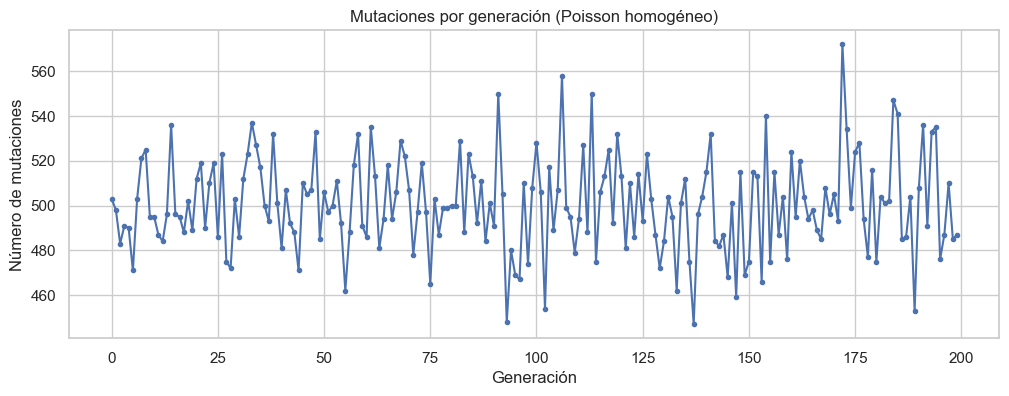

In [4]:
plt.figure(figsize=(12,4))
plt.plot(mutaciones, marker='o', markersize=3)
plt.title("Mutaciones por generación (Poisson homogéneo)")
plt.xlabel("Generación")
plt.ylabel("Número de mutaciones")
plt.grid(True)
plt.show()

## Estimación empírica del parámetro λ

In [5]:
lambda_estimado = np.mean(mutaciones)

print("λ real:     ", lambda_total)
print("λ estimado: ", lambda_estimado)
print("Diferencia: ", abs(lambda_estimado - lambda_total))

λ real:      500.0
λ estimado:  500.54
Diferencia:  0.5400000000000205


## Comparación empírica vs Poisson teórica (histograma + PMF)

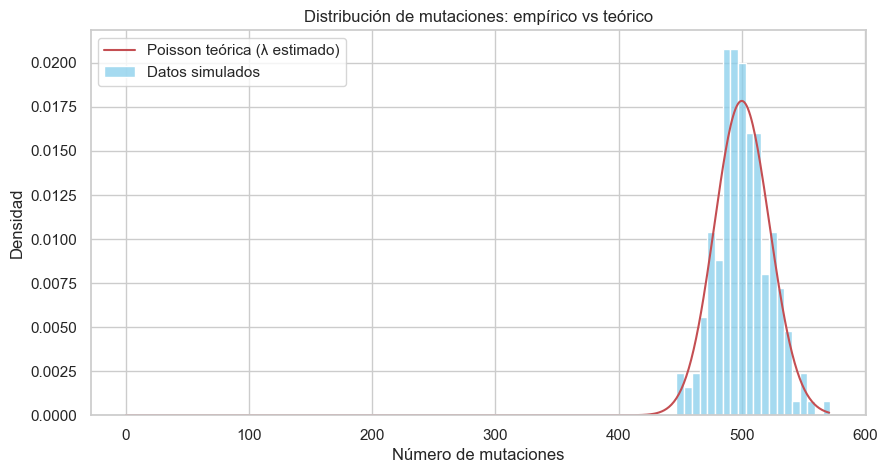

In [6]:
plt.figure(figsize=(10,5))

# Histograma empírico
sns.histplot(mutaciones, bins=20, stat="density", color="skyblue", kde=False, label="Datos simulados")

# Distribución teórica Poisson
xs = np.arange(0, max(mutaciones))
pmf = poisson.pmf(xs, mu=lambda_estimado)
plt.plot(xs, pmf, 'r-', label="Poisson teórica (λ estimado)")

plt.title("Distribución de mutaciones: empírico vs teórico")
plt.xlabel("Número de mutaciones")
plt.ylabel("Densidad")
plt.legend()
plt.show()

## Cálculo de varianza empírica vs teórica (prueba de adecuación)

In [7]:
var_empirica = np.var(mutaciones)
var_teorica = lambda_estimado   # en Poisson: Var = λ

print("Varianza empírica:  ", var_empirica)
print("Varianza teórica:   ", var_teorica)
print("¿Se parecen? ->", np.isclose(var_empirica, var_teorica, rtol=0.2))

Varianza empírica:   447.71840000000003
Varianza teórica:    500.54
¿Se parecen? -> True


## Proceso de Poisson NO homogéneo (λ(t) variable)

In [8]:
# Definimos una tasa que aumenta lentamente con las generaciones
lambda_t = lambda_mut + 0.002 * np.arange(G)       # función λ(t)
lambda_total_t = lambda_t * N                      # tasa total por generación

mutaciones_no_hom = np.random.poisson(lam=lambda_total_t)

mutaciones_no_hom[:10]

array([495, 485, 500, 508, 475, 524, 495, 476, 521, 533], dtype=int32)

## Gráfico del Poisson no homogéneo

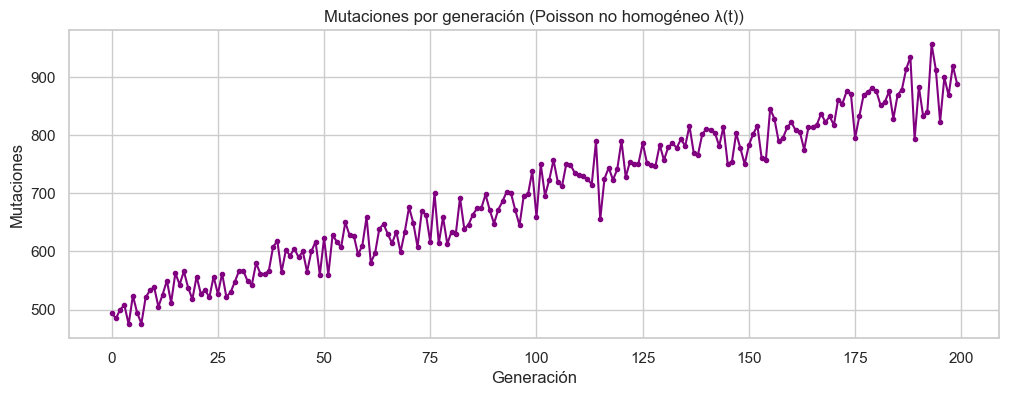

In [9]:
plt.plot(mutaciones_no_hom, marker='o', color='purple', markersize=3)
plt.title("Mutaciones por generación (Poisson no homogéneo λ(t))")
plt.xlabel("Generación")
plt.ylabel("Mutaciones")
plt.grid(True)
plt.show()

## Comparación homogéneo vs no homogéneo

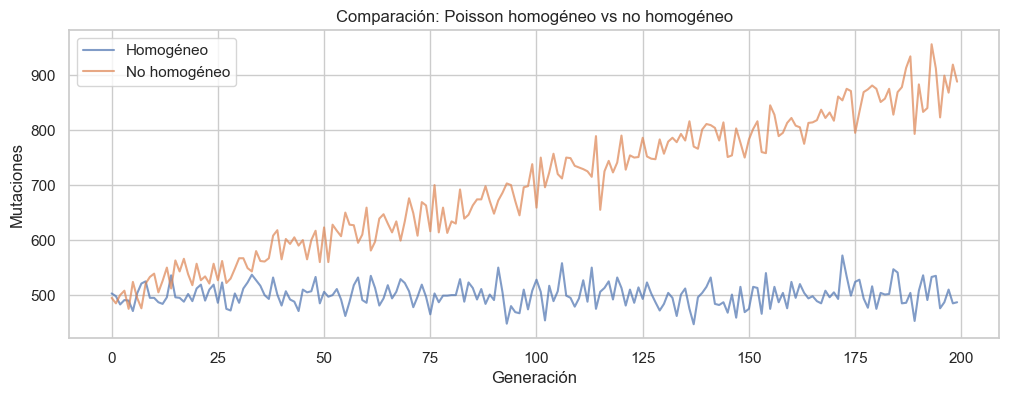

In [10]:
plt.plot(mutaciones, label="Homogéneo", alpha=0.7)
plt.plot(mutaciones_no_hom, label="No homogéneo", alpha=0.7)
plt.legend()
plt.title("Comparación: Poisson homogéneo vs no homogéneo")
plt.xlabel("Generación")
plt.ylabel("Mutaciones")
plt.grid(True)
plt.show()

## Guardar los datos

In [11]:
import pandas as pd

df = pd.DataFrame({
    "generacion": np.arange(G),
    "mutaciones_homogeneo": mutaciones,
    "mutaciones_no_homogeneo": mutaciones_no_hom
})

df.to_csv("mutaciones_poisson.csv", index=False)

df.head()


,generacion,mutaciones_homogeneo,mutaciones_no_homogeneo
0,0,503,495
1,1,498,485
2,2,483,500
3,3,491,508
4,4,490,475
